# Imports and Data

In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [7]:
df = pd.read_csv('Classified Data')

In [8]:
df.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1000 non-null   int64  
 1   WTT           1000 non-null   float64
 2   PTI           1000 non-null   float64
 3   EQW           1000 non-null   float64
 4   SBI           1000 non-null   float64
 5   LQE           1000 non-null   float64
 6   QWG           1000 non-null   float64
 7   FDJ           1000 non-null   float64
 8   PJF           1000 non-null   float64
 9   HQE           1000 non-null   float64
 10  NXJ           1000 non-null   float64
 11  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(2)
memory usage: 93.9 KB


In [10]:
df.describe()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,499.500000,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,288.819436,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.000000,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,249.750000,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,499.500000,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,749.250000,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,999.000000,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


# Train Test Split


In [17]:
from sklearn.model_selection import train_test_split

In [25]:
X = df.drop('TARGET CLASS', axis = 1)
y = df['TARGET CLASS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=  0.33, random_state=101)

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
knn = KNeighborsClassifier(n_neighbors=1)



In [33]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=1)

In [35]:
pred = knn.predict(X_test_scaled)

In [37]:
from sklearn.metrics import classification_report, confusion_matrix

In [39]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[159  14]
 [ 13 144]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       173
           1       0.91      0.92      0.91       157

    accuracy                           0.92       330
   macro avg       0.92      0.92      0.92       330
weighted avg       0.92      0.92      0.92       330



# Elbow Method -- to determine optimal K value


In [42]:
error_rate = []

for i in range(1, 40):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled, y_train)
    pred_i = knn.predict(X_test_scaled)
    error_rate.append(np.mean(pred_i != y_test))

In [44]:
error_rate

[0.08181818181818182,
 0.09393939393939393,
 0.07878787878787878,
 0.07272727272727272,
 0.07575757575757576,
 0.06363636363636363,
 0.07272727272727272,
 0.0696969696969697,
 0.0696969696969697,
 0.06666666666666667,
 0.06060606060606061,
 0.05454545454545454,
 0.05757575757575758,
 0.06060606060606061,
 0.05757575757575758,
 0.06060606060606061,
 0.05757575757575758,
 0.051515151515151514,
 0.06363636363636363,
 0.05454545454545454,
 0.05454545454545454,
 0.051515151515151514,
 0.04242424242424243,
 0.04242424242424243,
 0.03939393939393939,
 0.04242424242424243,
 0.048484848484848485,
 0.04242424242424243,
 0.045454545454545456,
 0.045454545454545456,
 0.048484848484848485,
 0.045454545454545456,
 0.051515151515151514,
 0.048484848484848485,
 0.051515151515151514,
 0.048484848484848485,
 0.048484848484848485,
 0.048484848484848485,
 0.048484848484848485]

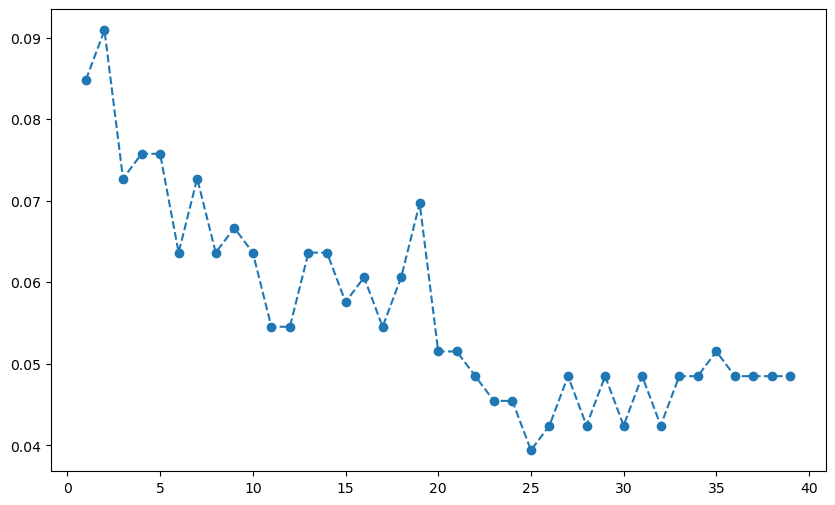

In [74]:
plt.figure(figsize = (10, 6))
plt.plot(range(1,40), error_rate, ls = '--', marker = 'o')

In [46]:
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_test_scaled, y_test)


KNeighborsClassifier(n_neighbors=25)

In [50]:
pred = knn.predict(X_test_scaled)

print(confusion_matrix(y_test, pred))
print('\n---------\n')
print(classification_report(y_test, pred))

[[163  10]
 [  8 149]]

---------

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       173
           1       0.94      0.95      0.94       157

    accuracy                           0.95       330
   macro avg       0.95      0.95      0.95       330
weighted avg       0.95      0.95      0.95       330

